In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
import pandas as pd
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Embedding,Dense,Dropout
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ara_sent/data.csv",encoding="utf-8")
df.sample(20)

,text,polarity
3523,الاكل المقدم سيء لغايه والمكان نظيف ابدا وتعام...,0
3455,مكان وطعام جميل اجمل المطاعم الاجواء والاكل ال...,1
9433,لذيذ واحب الحم بالبندوره حقهم حمص لحم ريش يمي يمي,1
5451,ديكور المطعم عادي الجلسات جدا عاديه البرجر تجي...,0
4600,مستوي المطعم امريكا جيد وكيله بالسعوديه يخدمه ...,0
3336,موقف سيء لغايه تعرضت زيارتي الاولي لهذا المطعم...,0
121,اختيار سن المثلين خطا كبير الفن المصري سينما ج...,0
6073,جوده الطبخ افضل المطاعم مستوي القصيم طبخ الارز...,1
6919,باباروتي مشهور بنوع معين الخبر يسموه بان يستحق...,1
9378,المطعم روعه بكل شي ديكور جميل وقاءمه جيده واسع...,1


In [ ]:
X=df['text']
y=df['polarity']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=60)

max phrase len: 925


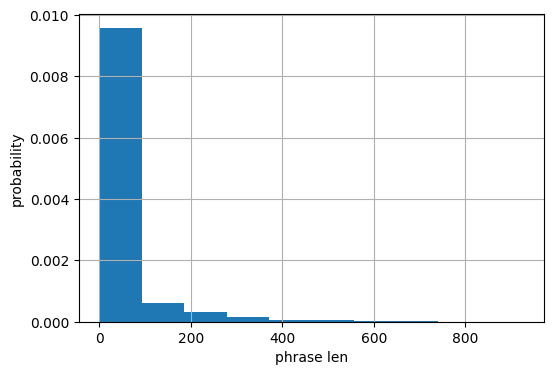

In [ ]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
plt.figure(figsize = (6, 4))
plt.hist(phrase_len, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid()

In [ ]:
vocab_size = 2**14 # Maximum number of words to keep based on word frequency
max_len = 200 # Maximum length of each sequence
embedding_dim = 64
oov_tok = '<OOV>' #  Out of Vocabulary

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok) 
tokenizer.fit_on_texts(X)

#word_index = tokenizer.word_index   # get word index
#word_counts = tokenizer.word_counts   # get word count 


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

In [ ]:
X_train.iloc[345]

'لا انصح بشراءها لانها لايوجد ضمان لا مركز صيانه جودتها رديءه'

In [ ]:
y_train.iloc[345]

0

In [ ]:
for i in X_train_seq[345]:
    print(f'{i} : {tokenizer.index_word[i]}')

4 : لا
25 : انصح
1698 : بشراءها
516 : لانها
1154 : لايوجد
5248 : ضمان
4 : لا
2017 : مركز
12184 : صيانه
5265 : جودتها
968 : رديءه


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size+1,embedding_dim ,input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           1048640   
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,377,601
Trainable params: 1,377,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [ ]:
model.fit(X_train_pad, y_train,
          batch_size=22,epochs=100,
          validation_data=(X_test_pad, y_test))

Epoch 1/100
333/333 [==============================] - 75s 204ms/step - loss: 0.6731 - accuracy: 0.6023 - val_loss: 0.6695 - val_accuracy: 0.6148
Epoch 2/100
333/333 [==============================] - 43s 128ms/step - loss: 0.6790 - accuracy: 0.6014 - val_loss: 0.6803 - val_accuracy: 0.6148
Epoch 3/100
333/333 [==============================] - 25s 75ms/step - loss: 0.6784 - accuracy: 0.5896 - val_loss: 0.6664 - val_accuracy: 0.6148
Epoch 4/100
333/333 [==============================] - 18s 54ms/step - loss: 0.6728 - accuracy: 0.6074 - val_loss: 0.6665 - val_accuracy: 0.6152
Epoch 5/100
333/333 [==============================] - 14s 41ms/step - loss: 0.6627 - accuracy: 0.6172 - val_loss: 0.6728 - val_accuracy: 0.6135
Epoch 6/100
333/333 [==============================] - 13s 38ms/step - loss: 0.6550 - accuracy: 0.6208 - val_loss: 0.6759 - val_accuracy: 0.6115
Epoch 7/100
333/333 [==============================] - 10s 30ms/step - loss: 0.6456 - accuracy: 0.6250 - val_loss: 0.6922 - val_

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_pad, y_test)

print("Test Accuracy:", test_acc)

77/77 [==============================] - 1s 8ms/step - loss: 1.6630 - accuracy: 0.7775
Test Accuracy: 0.7774590253829956


In [ ]:
# Make predictions on new data
txt = ["خدمة زباله","وحش جدا المكان محدش يروحه","انصح بالفيلم ده كويس ","انا حزين جدا","سعيد جدا الان "]
new_sequences = tokenizer.texts_to_sequences(txt)
new_data = pad_sequences(new_sequences, maxlen=max_len)
predictions = model.predict(new_data)

1/1 [==============================] - 0s 34ms/step


In [ ]:
for i in range(len(txt)):
  print(f'{txt[i]} : { "ايجابي"if predictions[i][0]>0.5 else "سلبي" }')


خدمة زباله : سلبي
وحش جدا المكان محدش يروحه : سلبي
انصح بالفيلم ده كويس  : ايجابي
انا حزين جدا : سلبي
سعيد جدا الان  : ايجابي
